<a href="https://colab.research.google.com/github/TanvirUthsho/BhojonBazzar/blob/main/teeth_classification_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
#connect google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Paths to your training, validation, and test datasets
train_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/Mendeley dataset 19.4.2024/Split Data/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/Mendeley dataset 19.4.2024/Split Data/validation'
test_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/Mendeley dataset 19.4.2024/Split Data/test'

import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory


# Get class names directly from directory structure
class_names = sorted(os.listdir(train_dir))

# Remove any hidden files or folders (starting with '.')
class_names = [name for name in class_names if not name.startswith('.')]

print(class_names)
# Parameters
batch_size = 32
img_size = (224, 224)  # Resize all images to 224x224 (or adjust according to your needs)

# Load the datasets
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=img_size)

val_dataset = image_dataset_from_directory(val_dir,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           image_size=img_size)

test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=True,
                                            batch_size=batch_size,
                                            image_size=img_size)

# Prefetching for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

['Lower Front', 'Lower Left', 'Lower Occlusal', 'Lower Right', 'Upper Front', 'Upper Left', 'Upper Occlusal', 'Upper Right']
Found 7646 files belonging to 8 classes.
Found 956 files belonging to 8 classes.
Found 960 files belonging to 8 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-process dataset

In [ ]:
standardization_layer = layers.Rescaling(scale=1./127.5, offset=-1)  # Scale to [-1, 1] range

#Build Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Model with L2 regularization
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Training the Model

In [ ]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train with early stopping
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping])



Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1356s 6s/step - accuracy: 0.6922 - loss: 1.2386 - val_accuracy: 0.9592 - val_loss: 0.4227
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 106s 241ms/step - accuracy: 0.9463 - loss: 0.3991 - val_accuracy: 0.9592 - val_loss: 0.3583
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 65s 270ms/step - accuracy: 0.9605 - loss: 0.3412 - val_accuracy: 0.9718 - val_loss: 0.3331
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 80s 263ms/step - accuracy: 0.9642 - loss: 0.3290 - val_accuracy: 0.9749 - val_loss: 0.3205
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 76s 239ms/step - accuracy: 0.9729 - loss: 0.2890 - val_accuracy: 0.9686 - val_loss: 0.3326
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 87s 261ms/step - accuracy: 0.9770 - loss: 0.2737 - val_accuracy: 0.9738 - val_loss: 0.3146
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 81s 259ms/step - accuracy: 0.9761 - loss: 0.2775 - val_accuracy: 0.9634 - val_loss: 0.3245
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 80s 249ms/step - accuracy: 0.9732 - loss: 0

#Evaulate the Model

30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.9729 - loss: 0.3019
Test accuracy: 0.9750000238418579


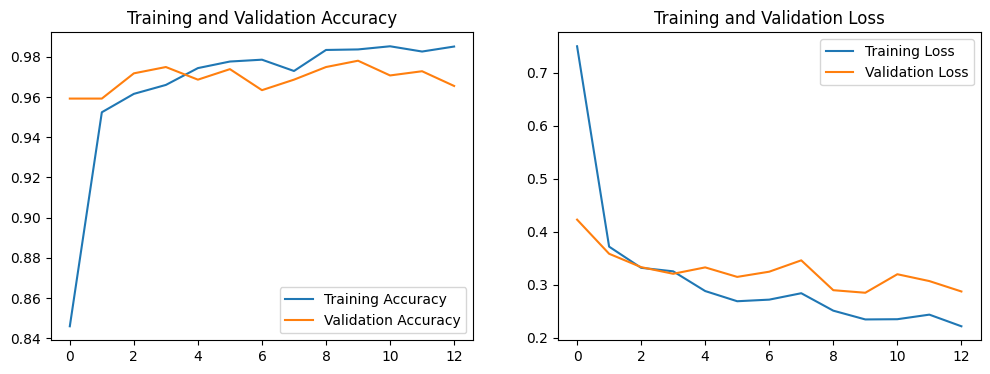

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 13
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Save the trained model
model.save('/content/drive/MyDrive/Colab Notebooks/dataset/teeth_classification_model_8.keras')  # Change the path as necessary


# Predict an image

In [ ]:
# Load the saved model
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/dataset/teeth_classification_model_8.keras')

# Predict on a new image
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image from the test set and preprocess it
img_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Mendeley dataset 19.4.2024/Split Data/test/Lower Right/LR 0002.jpg'  # Provide the correct path to the image
img = image.load_img(img_path, target_size=(224, 224))  # Ensure size matches the model's input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image to [0,1] range

# Get predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)  # Get the class index with the highest probability

# Display predicted class name
print(f'Predicted class: {class_names[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Upper Occlusal


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Final Training Accuracy: {acc[-1]}")
print(f"Final Validation Accuracy: {val_acc[-1]}")
print(f"Final Training Loss: {loss[-1]}")
print(f"Final Validation Loss: {val_loss[-1]}")

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Final Training Accuracy: 0.9850902557373047
Final Validation Accuracy: 0.965481162071228
Final Training Loss: 0.2214083969593048
Final Validation Loss: 0.28711605072021484
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9724 - loss: 0.3190
Test Loss: 0.2897886037826538
Test Accuracy: 0.9750000238418579
